<a href="https://colab.research.google.com/github/A01793546/MNA_IAyAA/blob/main/MNA_IAyAA_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

## **Adtividad de la Semana 6**
###**Árboles de decisión y bosque aleatorio.**


**Nombres y matrículas de los integrantes del equipo:**

*   
*   
*   
*   
*   


En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [ ]:
# Incluye aquí todos módulos, librerías y paquetes que requieras.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.datasets import make_classification

from sklearn.model_selection import train_test_split #Para hacer las particiones
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score         

from sklearn.metrics import classification_report, make_scorer
from imblearn.metrics import geometric_mean_score, classification_report_imbalanced
from sklearn.model_selection import  cross_validate,  RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import requests, zipfile
from io import BytesIO

#Librerias para el ejercicio 4, los modelos
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier #Esta tambien la usamoie en el ejercicio 5e

#Librerias para el ejercicio 5
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
#Para el ejercicio 6
from sklearn import tree


import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, validation_curve

import os
import pandas as pd
from google.colab import drive

# Considerar librería que añada archivos .asc o revisar si la pasndas tiene esa capacidad

#**Ejercicio-1.** 

In [ ]:
#Así, con base a datos históricos, el objetivo es predecir si una persona es clasificada como confiable a la
#asignación de un crédito, o no lo es. La variable de salida se llama “kredit”.


In [ ]:
#Primero montamos el drive para poder cargarel arhivo que tenemos guardado en el drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Este metodo es para poder leer directametne desde el zip y directamente de la URL donde esta la zip sin descargar nada
# importing necessary modules
print('Downloading started')

#Defining the zip file URL
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00522/SouthGermanCredit.zip'

# Split URL to get the file name
filename = url.split('/')[-1]

# Downloading the file by sending the request to the URL
#Para poder usar request necesitamos la libreria import requests, zipfile
from io import BytesIO

req = requests.get(url)
print('Downloading Completed')

# extracting the zip file contents
zipfile= zipfile.ZipFile(BytesIO(req.content))
zipfile.extractall('/content/sample_data/SouthGermanCredit')
df = pd.read_csv("/content/sample_data/SouthGermanCredit/SouthGermanCredit.asc",sep=' ')


In [ ]:
#Ruta del archivo a descargarse
#Usamos el mismo metodo read_csv, con el argumento s+, para identificar los espacios en vez de separacion por coma

#Para poder tener el archivo desde github sin tenerlo local, lo subimos a github en forma publica, y le damos click en el boton "raw" y nos da la dirección, recordar que tiene que estar publico
#df= pd.read_csv('/content/drive/MyDrive/Colab Notebooks/SouthGermanCredit.asc', sep='\s+')
#df= pd.read_csv('https://raw.githubusercontent.com/PosgradoMNA/actividades-de-aprendizaje-KarltonBotics/main/DataFrames/SouthGermanCredit.asc', sep='\s+')
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [ ]:
#Carga los datos y sustituye los nombres de las columnas del alemán al inglés de acuerdo a como se indica en la página de la UCI.
df.rename(columns = {
    'laufkont':'status',
    'laufzeit':'duration',
    'moral':'credit_history',
    'verw':'purpose',
    'hoehe':'amount',
    'sparkont':'savings',
    'beszeit':'employment_duration',
    'rate':'installment_rate',
    'famges':'personal_status_sex',
    'buerge':'other_debtors',
    'wohnzeit':'present_residence',
    'verm':'property',
    'alter':'age',
    'weitkred':'other_installment_plans',
    'wohn':'housing',
    'bishkred':'number_credits',
    'beruf':'job',
    'pers':'people_liable',
    'telef':'telephone',
    'gastarb':'foreign_worker',
    'kredit':'credit_risk'
}, inplace = True)
#El inplace true, nos permite hacer la mutación sobre el mismo dataframe, sin necesidad d ecrear otro nuevo
df.head()
df.head().sum()

#Aqui no va a correr, pero el chiste es poner un ciclo que imprima las variables unicas en cada columna del dataset, para poder observar o confirmas que son categorias, o binatrias.
#'''Estas tres comillas agarran el texto como comentario
'''for i in df:
  print(df[i]9 + " variables unicas" + df[i].unique())'''


'for i in df:\n  print(df[i]9 + " variables unicas" + df[i].unique())'

In [ ]:
#Creación de espacio s dvalidación y prueba

#Determinamos las columnas que tenda el eje x, que en este caso son todas las demas columnas
X = df.iloc[:,0:20]
#Opcion alternativa al iloc es declaracion manual X=df["status","duration",...]

#Determinamos las columnas que contendra el eje y, que en este caso es solo la ultima columna
y = df.iloc[:, -1]

#creamos nuestros datos de validación con la función trains_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.85, random_state=10)
X_train.head()
df.columns

#Aqui imprimimos las columnas para asegurarnos que ambos sets de validación y prueba contienen las mismas columnas
#print("Registros Totales: " + str(CompleteDataFrame.shape()))
print("Registros de Entrenamiento: \n" + str(X_train.columns))
print("\n")
print("Registros de Validación: \n" + str(X_val.columns))

Registros de Entrenamiento: 
Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')


Registros de Validación: 
Index(['status', 'duration', 'credit_history', 'purpose', 'amount', 'savings',
       'employment_duration', 'installment_rate', 'personal_status_sex',
       'other_debtors', 'present_residence', 'property', 'age',
       'other_installment_plans', 'housing', 'number_credits', 'job',
       'people_liable', 'telephone', 'foreign_worker'],
      dtype='object')


In [ ]:
X_train.describe()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.00000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,2.595294,20.462353,2.527059,2.851765,3216.104706,2.121176,3.384706,2.981176,2.690588,1.155294,2.852941,2.34000,35.603529,2.663529,1.924706,1.402353,2.900000,1.848235,1.403529,1.963529
std,1.260425,11.726531,1.077600,2.762129,2748.335186,1.590060,1.228442,1.114049,0.714666,0.491987,1.102849,1.04928,11.464257,0.716431,0.524074,0.570573,0.651627,0.359004,0.490894,0.187568
min,1.000000,4.000000,0.000000,0.000000,250.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,19.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,12.000000,2.000000,1.000000,1374.000000,1.000000,3.000000,2.000000,2.000000,1.000000,2.000000,1.00000,27.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
50%,2.000000,18.000000,2.000000,2.000000,2301.500000,1.000000,3.000000,3.000000,3.000000,1.000000,3.000000,2.00000,33.000000,3.000000,2.000000,1.000000,3.000000,2.000000,1.000000,2.000000
75%,4.000000,24.000000,4.000000,3.000000,3959.000000,3.000000,5.000000,4.000000,3.000000,1.000000,4.000000,3.00000,42.000000,3.000000,2.000000,2.000000,3.000000,2.000000,2.000000,2.000000
max,4.000000,72.000000,4.000000,10.000000,15945.000000,5.000000,5.000000,4.000000,4.000000,3.000000,4.000000,4.00000,75.000000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


#**Ejercicio-2.**

# Nueva sección

In [ ]:
None

#**Ejercicio-3.**

In [ ]:
from pandas.core.arrays import categorical
#Definir las variables categórica (categorical), ordinal, (discretized quantitative), numérica (quantitative) y binaria (binary).
#Entendemos que estas variables van a contener las columnas de cada uno de los tipos indicados. Es decir, en el df categorico irn las columnas con datos categoricos, etc.
#Para identificar el rubro, solamente vimos el sitio web del documento donde nos dice el tipo de cada columna
#Aun no estamos llamadolos del dataframe, unicamente pondremos los nombres de las columnas

#Revisar despues que todos tengamos bien identificadas las variables
#Columnas categoricas
df_cate = ['status','credit_history','purpose','savings','personal_status_sex','other_debtors','other_installment_plans','housing','telephone']
#columnas ordinales o discretas cuatntitativas=beszeit,rate,wohnzeit,bishkred,beruf, pers
df_ord = ['employment_duration','installment_rate','present_residence','property','number_credits','job']
#columnas numericas o cuantitativas = laufzeit,hoehe
df_num = ['duration','amount','age']
#columnas binarias= pers,telef,gastarb,kredit
df_bin = ['people_liable','telephone','foreign_worker']
#'credit_risk', esta es binaria es la ultima columna, que vamos a considerar como y, poque es nuestro resultado, o nuestra conclusion. Es la y, porque es lo que queremos saber.

In [ ]:
#Hacer un pipeline que Imputación a todas las variables de entrada, diferenciando entre el tipo de cada variable (decide y justifica que tipo de imputación realizas en cada caso).
#Antes de cualquier imputaci[on hacemos una limpieza de nuestro data set.
#Revisamos datos nulos
X_train.isnull().sum()
#Estamos limpios por defecto
#De alguna foma, sabemos que solo usaremos X_train, por lo que no nos preocupamos por el Y?train ni nada de eso

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
dtype: int64

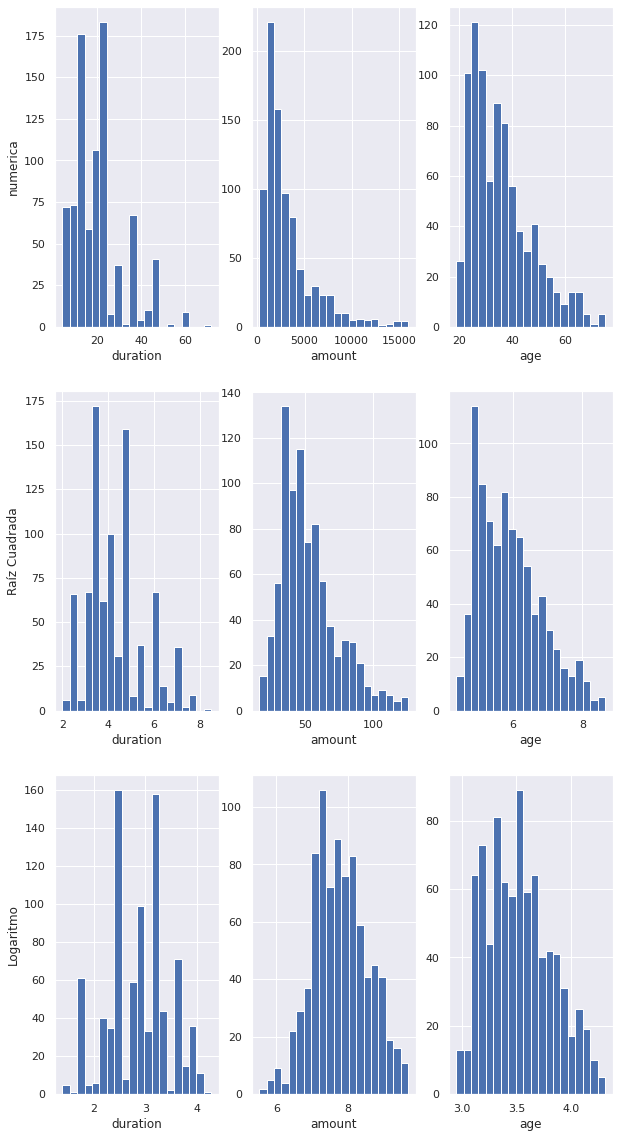

In [ ]:
################Esta parte no es del ejercicio, es solamente un ejercicio personal para ver cual es el mejor metodo de centralizacin de datos
sns.set(rc={'figure.figsize':(10,20)}) #tama;o 20 en x y 20 en y
#Numerica
k=0
fig, axes = plt.subplots(3, 3)   
for k in range(0,3):  
  plt.subplot(3,3,k+1) 

  Transf0 = X_train[df_num].iloc[:,k].to_numpy().reshape(-1, 1)  #  En esta línea se debe asignar a Transf0 los valores de cada variable "k" sin transformar.
  plt.hist(Transf0, bins=20) 
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('numerica')
  
  plt.subplot(3,3,k+4)    
  Transf1 = np.sqrt(Transf0)       #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
  plt.hist(Transf1, bins=20)                      #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('Raíz Cuadrada')

  plt.subplot(3,3,k+7)    
  Transf2 = np.log(Transf0)       #  En esta línea se debe aplicar la raíz cuadrada a los valores de cada variable "k" sin transformar.
  plt.hist(Transf2, bins=20)                      #  En este línea agrega el comando para obtener el histograma de Transf1 con 20 barras (bins).
  plt.xlabel(df_num[k])
  if k==0:
    plt.ylabel('Logaritmo')

#De estas graficas, nadamas seleccionamos la que para nosotros esta mas bonita en cuanto a dispersion de datos, para poder trabajar con ellos. Yo me enamore de la ultima

In [ ]:
#3b. Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica unatransformación que escale a todas ellas en un rango equiparable.
#El metodo equiparable es el maxmin escaler

#Ahora si hacemos la imputacion, que significa sustituir algun dato nulo o valores atipicos, por lo que se procede a 
#Una justificacion puede ser que no hay imputaciones porque no hay datos nulos, o si queremos poner la media, mediana, etc.
#Antes de pasar al 3b, hacemos el pipeline de cada tipo de variable, recomendablemente, aunque tambien se puede hacer directo a la hora de la hora, pero eso lleva en cada modelo tener que transdormar nuestros tipos de variables
#Recordemos importar la libreria pipeline
#df_num_pip = Pipeline(steps = [('impMean', SimpleImputer(strategy='median')),  
#                                        ('scalar', MinMaxScaler(feature_range=(1,2))),
#                                        ('sqrt', FunctionTransformer(np.log))])  
#num_pipeline_nombres = numerica
#Para nuestro pipeline, seleccionamos el escalamiento, minmax, para evitar que nos
#Tambien debemos de definir si vamos a tratar nuestros datos normales,o si les vamos a hacer alguna transformacion para acampanarlos osea acercarlos a la media, pero eso es muy raro para mi.
#numericas = Pipeline(steps = [("imputer", SimpleImputer(strategy='mean')),("scaler", MinMaxScaler())])
#Esta parte no es obligatoria, pero es como de estilo y mejora ('sqrt', FunctionTransformer(np.log)), es para centrar los datos la campanita.
#En esta parte el log, lo observamos en el ejercicio de las graficas de arriba
#Recordemos que el minmax scales es una transformacion opcional para normalizar, evitando que los datos de valores elevados nos generann desvalanceo con sus pesos
#Recordemos que le minmax es obligatorio, porque se pide en el 3b
df_num_pip= Pipeline(steps = [('impMean', SimpleImputer(strategy='median')), ('scalar', MinMaxScaler(feature_range=(1,2)))])
#df_num_pip = Pipeline(steps = [('scalar', MinMaxScaler(feature_range=(1,2))),('sqrt', FunctionTransformer(np.log))])
#Ahora definimos una variable, para que el modelo sepa a que columnas o datos le vamos a aplicar el pipeline definido
columnas_a_aplicar_df_num_pip = df_num 
#Recordemos que las categoricas no llevan la misma normalizacion, osea no podemos poner en un rango un diccionario de datos.
#En este caso la imputacion a las categoricas es la moda, 'most_frequent' lo que significa que pondra el numero de moda sin afectar su categoricidad.
#Aqui nadamas investigamos que es el la transformación One-Hot encoding, indicado
df_cate_pip = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_a_aplicar_df_num_cate = df_cate
# Recordemos que quitamos el drop firts, reemplazado por el  (handle_unknown="ignore"), el onehotencoder es solo viable para variables binarias, para no repeetir,pero no para las categoricas.
#A las ordinales nos les vamos a hacer nada porque el profe dijo, pero de todos modos hacemos su pipeline
#df_ord_pip = Pipeline(steps = [('scalar', MinMaxScaler(feature_range=(1,2))),('sqrt', FunctionTransformer(np.log))])
#Recordemos que el pipeline para las binarias es exactamente el mismo de las categoricas
df_bin_pip = Pipeline(steps = [('impModa', SimpleImputer(strategy='most_frequent')),('OneHotE', OneHotEncoder(handle_unknown="ignore"))])
columnas_a_aplicar_df_nbin_pip = df_bin

#Revisar que ocurre con el dropfirst, poque en teoria, quita la columna indicer, aunque se comenta, que no se lleva el indice sino que se lleva una columna la primera con la primer variable
#
#Nota de lo que hace el One Hot. Agarra un dataframe de 1 dimension con varios valores, y hace columnas para cada tipo de valor, y en vez de  de tenener valores dentro, solo les pone 1 y 0, a cada columna que contiene el valor
# el drop firs, borra la columna original con los valores y nos deja las nuevas columnas con ceros y unos
# ejemplo=[rojo, verde, rojo, azul, rojo]
#Aplicamos el one hot y nos queda rojo=[1,0,1,0,1], verde=[0,1,0,0,0], azul=[0,0,0,1,0]

#Recordemos que solo son 3 pipelines porque la instrucción dice que no hagamos nada con las ordinales: Por el momento dejar las variables ordinales sintransformar.
#Imputamos aunque no tengamos datos vacios, por que somos finos, y en caso de futuros datos ingresados, pues nuestro pipeline, va a solucionar antes de que llegue el caos.

In [ ]:
#Pasamos al 3.c
#Realiza un análisis de las variables numéricas (quantitative) de entrada y aplica una transformación que escale a todas ellas en un rango equiparable.
#Aplicar tranformacion que escale 
#Definimos nuestra varia de tranformación de columnas, unicamente asignando una etiqueta al pipeline, y llamando cada pipeline
#Col_Trans = ColumnTransformer(transformers=[('etiqueta', pipeline,datos donde se aplica el pipeline)
Col_Trans = ColumnTransformer(transformers=[('numericas', df_num_pip, columnas_a_aplicar_df_num_pip), 
                                            ('categoricas', df_cate_pip, columnas_a_aplicar_df_num_cate), 
                                            ('binarias', df_bin_pip, columnas_a_aplicar_df_nbin_pip)], 
                                            remainder='passthrough')

#Esta parte no se pide en el ejercicio aun, pero lo usamos para observar las trasnformaciones y analizar lo que deseemos
X_train_fit = Col_Trans.fit(X_train)
pd.DataFrame(X_train_fit.transform(X_train))

#Vamos a ver esta matriz  que ya tiene mas columnas, porque ya aplica los pipelines y los OneHot son los que añaden columnas

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,1.117647,1.048232,1.053571,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,3.0,4.0,1.0,1.0,1.0,3.0
1,1.294118,1.095381,1.089286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,2.0,4.0,1.0,2.0,1.0,2.0
2,1.117647,1.034724,1.607143,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,2.0,4.0,4.0,2.0,1.0,3.0
3,1.470588,1.154253,1.553571,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,3.0,4.0,4.0,4.0,1.0,3.0
4,1.470588,1.502262,1.196429,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,3.0,1.0,2.0,2.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
845,1.088235,1.085824,1.375000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,1.0,0.0,3.0,3.0,2.0,4.0,1.0,2.0
846,1.117647,1.170755,1.142857,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,4.0,2.0,1.0,1.0,1.0,3.0
847,1.294118,1.130806,1.464286,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,5.0,4.0,1.0,1.0,1.0,3.0
848,1.294118,1.309207,1.500000,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,2.0,3.0,3.0,4.0,3.0,3.0


In [ ]:
'''Este renglon no es obligatorio
El objetivo de esta parte es comparar la tranformación 
configuracion_train_pipeline = columnasTransformer.fit(X_train)
df_train = pd.DataFrame(configuracion_train_pipeline.transform(X_train))
df_train = pd.DataFrame(df_train)

print(df_train.columns)
print("**************************\n")

configuracion_val_pipeline = columnasTransformer.fit(X_val)
df_val = pd.DataFrame(configuracion_val_pipeline.transform(X_val))
df_val = pd.DataFrame(df_val)
print(df_val.columns)'''

'Este renglon no es obligatorio\nEl objetivo de esta parte es comparar la tranformación \nconfiguracion_train_pipeline = columnasTransformer.fit(X_train)\ndf_train = pd.DataFrame(configuracion_train_pipeline.transform(X_train))\ndf_train = pd.DataFrame(df_train)\n\nprint(df_train.columns)\nprint("**************************\n")\n\nconfiguracion_val_pipeline = columnasTransformer.fit(X_val)\ndf_val = pd.DataFrame(configuracion_val_pipeline.transform(X_val))\ndf_val = pd.DataFrame(df_val)\nprint(df_val.columns)'

#**Ejercicio-4.**

In [ ]:
#Tenemos que hacer 3 cosas_ Regresión Logística, Árbol de Decisión y Bosque Aleatorio
#entrenamiento de los tres de manera conjunta usando un ciclo FOR.
#Recuerdaaplicar las transformaciones que definiste en tu Pipeline.

In [ ]:
#Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando el tamaño de la muestra para el modelo de regresión Logística con su
#hiperparámetros predeterminados. Utilizar al menos 20 puntos en la partición de los conjuntos de entrenamiento y la métrica “f1-score”, como evaluación del
#desempeño de dicha función “learning_curve()”.

In [ ]:
#Los modelos los copiamos de la actividad 3 de IA, de regresion logistica
#En cada iteración deben calcularse todas las siguientes métricas: accuracy, precision,
#recall, f1-score y Gmean. Todas estas métricas deben ser funciones que tú mismo debes
#definir (Es decir, no usar las funciones de dichas métricas que te proporciona scikit-learn.
#Sin embargo, sí puedes usar la información regresada por el método confusion_matrix()
#de scikit-learn para definir las métricas).

def get_models():
  #Creamos dos listas para ir metiendo los modelos
  modelos = list()
  nombres = list()

#Todas quedan con los parametros originales, por eso los parentesis de cada funcion llamada estan en blanco

  # LR - Regresión Logística:
  modelos.append(LogisticRegression(solver='liblinear'))
  nombres.append('LR')

  # DT - Árbol de Decisión:
  modelos.append(DecisionTreeClassifier())
  nombres.append('DT')
  
  #RD - Ranfom Forest
  modelos.append(RandomForestClassifier())
  nombres.append('RF')
  
  return modelos, nombres

In [ ]:
#Definimos funciones especificas

#Estos parametros los usamos para auxilio en comparaciones, pero no son solicitados por el maestro

#Estas funciones las habiamnos trabajado previamente, para mas información ver el documento del maestro
def mi_accuracy(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  accuracy = (tp+tn)/(tp+tn+fp+fn)
  return accuracy

def mi_precision(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  precision = tp/(tp+fp)
  return precision

def mi_recall(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  recall = tp/(tp+fn)
  return recall

#El unico parametro solicitado por el maestro es  el f score

def mi_f1score(yreal, ypred):
  tn, fp, fn, tp = confusion_matrix(yreal, ypred).ravel()
  f1score = (2*tp)/((2*tp)+fp+fn)
  return f1score

def mi_gmean(yreal, ypred):
  tn,fp,fn,tp= confusion_matrix(yreal,ypred).ravel()
  recall = mi_recall(yreal, ypred)
  especificidad= tn / (tn+fp)
  gmean = np.sqrt(recall*especificidad)
  #En caso de querer comprobar que el gmean tenga buen resultado, usamos la funcion de sklearn
  #PEgar funcion aqui
  return gmean



In [ ]:
#from pandas.core.dtypes.base import E
#Esta parte la vamos analizando de los ejercicios del profesor, en la actividad 5 donde llamavamos el recall y las funciones anteriormente descritas

#Esta parte es hasta la 4 c, deonde hacemos la validación cruzada

modelos, nombres = get_models()  # cargamos los modelos a comparar que son las listas que declaramos en el renglon de arriba
resultados = list()   

#Recorremos la longitud de la lista de modelos

for i in range(len(modelos)):

#Kfold es nuestra variable que contienen la validaci[on cruzada, con 5 particiones, y 3 repeticiones]
  kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3)
#Nuestra variable pipeline, recibe como paramtros nuestra transformaciones de las columnas iniciales
#Y la lista de los modelos a aplicarse Logistic Regresion, Decision Tree y Random forest
  pipeline = Pipeline(steps=[('ct',Col_Trans),('m',modelos[i])])

#Generando un diccionario de metricas, o una variable que continene la lista de metricas a aplciarse en nuestra validacion cruzada

  mismetricas = {
      "accuracy": make_scorer(mi_accuracy),
      "precision": make_scorer(mi_precision),
      "recall": make_scorer(mi_recall),
      "f1score": make_scorer(mi_f1score),
      "gmean": make_scorer(mi_gmean)
  }
#Creamos nuestra variable que contendra los resultados de la validacion cruzada.

  resultadosOU = cross_validate(pipeline, X_train, y_train, scoring=mismetricas, cv=kfold, return_train_score=True)

#PArte 4d, imprimimos el valor de todas las metricas

  resultados.append(resultadosOU)
  print("Prueba \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i],
                                                                          np.mean(resultadosOU['test_accuracy']), np.std(resultadosOU['test_accuracy']), 
                                                                          np.mean(resultadosOU['test_precision']),np.std(resultadosOU['test_precision']), 
                                                                          np.mean(resultadosOU['test_recall']),np.std(resultadosOU['test_recall']),
                                                                          np.mean(resultadosOU['test_f1score']),np.std(resultadosOU['test_f1score']),
                                                                          np.mean(resultadosOU['test_gmean']),np.std(resultadosOU['test_gmean'])
                                                                          ))
  
  # Con este paramtero dentro de la validaci[on cruzada,  return_train_score=True), podemos acceder a los datos de abai
  print("Entrenamiento \n") 
  print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Precision: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nmean F1score: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (nombres[i], 
                                                                          np.mean(resultadosOU['train_accuracy']), np.std(resultadosOU['train_accuracy']),  
                                                                          np.mean(resultadosOU['train_precision']), np.std(resultadosOU['train_precision']), 
                                                                          np.mean(resultadosOU['train_recall']), np.std(resultadosOU['train_recall']),
                                                                          np.mean(resultadosOU['train_f1score']), np.std(resultadosOU['train_f1score']), 
                                                                          np.mean(resultadosOU['train_gmean']), np.std(resultadosOU['train_gmean']) ))



Prueba 

LR:
mean Accuracy: 0.756 (0.0266)
mean Precision: 0.796 (0.0153)
mean Recall: 0.882 (0.0417)
mean F1score: 0.836 (0.0211)
Gmean: 0.629 (0.0350)

Entrenamiento 

LR:
mean Accuracy: 0.794 (0.0081)
mean Precision: 0.822 (0.0073)
mean Recall: 0.905 (0.0043)
mean F1score: 0.861 (0.0051)
Gmean: 0.688 (0.0156)

Prueba 

DT:
mean Accuracy: 0.679 (0.0229)
mean Precision: 0.778 (0.0203)
mean Recall: 0.767 (0.0344)
mean F1score: 0.772 (0.0182)
Gmean: 0.595 (0.0414)

Entrenamiento 

DT:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)

Prueba 

RF:
mean Accuracy: 0.758 (0.0221)
mean Precision: 0.783 (0.0153)
mean Recall: 0.912 (0.0335)
mean F1score: 0.842 (0.0158)
Gmean: 0.589 (0.0467)

Entrenamiento 

RF:
mean Accuracy: 1.000 (0.0000)
mean Precision: 1.000 (0.0000)
mean Recall: 1.000 (0.0000)
mean F1score: 1.000 (0.0000)
Gmean: 1.000 (0.0000)



In [ ]:
#4d, para crear las cajas de bigotes
#los diagramas de caja los copiamos del ejercicio 

#Esta es la funcion de ploteo que utilizarremos para cada vez que se requiera imprimir una curva de aprendizaje en cualquier parte dle ejercicio
def mi_LearningCurvePlot(train_sizes, train_scores, val_scores): 
#Argumentos de entrada de la función mi_LearningCurvePlot: # train_sizes : número de observaciones en el conjunto de entrenamiento. 
# train_scores : Exactitud de cada partición en el proceso de Validación-Cruzada (VC) en los datos de entrenamiento. 
# La dimensión de este conjunto es (pxq)  # donde p="número de particiones de manera incremental del conjunto de entrenamiento". 
# q="número de particiones de VC" * "número de repeticiones de VC con RepitedStratifiedCV" 
# val_scores : Exactitud de cada partición en el proceso de Validación-Cruzada en los datos de validación. 
# Es de la misma dimensión que los train_scores.  
# Output: la salida es el gráfico con las curvas de aprendizaje. 
# Obtenemos los promedios y desviaciones estándar de cada renglón de los resultados de entrenamiento y validación 
# La dimensión de cada uno es p="número de particiones de manera incremental del conjunto de entrenamiento". 
  train_mean = np.mean(train_scores, axis=1) 
  train_std = np.std(train_scores, axis=1) 
  val_mean = np.mean(val_scores, axis=1) 
  val_std = np.std(val_scores, axis=1) 
# Graficamos las curvas de aprendizaje incluyendo una región indicando la desviación estándar. 
  plt.figure(figsize=(7,6)) 
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training') 
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')  
  plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation') 
  plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')  
  plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra') 
  plt.xlabel('Tamaño del conjunto de entrenamiento') 
  plt.ylabel('Exactitud (accuracy)') 
  plt.grid() 
  plt.legend(loc='lower left') 
  plt.show()

def mi_ModeloYCurvas(Xin): 
# Usemos primeramente el modelo de regresión logística 
#con sus parámetros predeterminados y semilla igual a 1. 
#Incremenetamos además el máximo de iteraciones para  
# asegurar la convergencia de cada partición de la VC. 
  modelo_logi = LogisticRegression(max_iter=2500, random_state=1) 
  mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("LR", modelo_logi)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
  delta_train_sz = np.linspace(0.1, 1.0, 40) 
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = Xin,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_f1score))

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

In [ ]:
#Defininmois la funcion para crear ploteo de cruvas, en espcial dla de validationcurve
#Esto no lo pide el ejercicio, es solo para crear una funcion generica de ploteo tanto para validaci[on como para aprendizaje
def mi_Ploteador(train_sizes, train_scores, val_scores, titulo_de_grafica): 

  train_mean = np.mean(train_scores, axis=1) 
  train_std = np.std(train_scores, axis=1) 
  val_mean = np.mean(val_scores, axis=1) 
  val_std = np.std(val_scores, axis=1) 
  plt.figure(figsize=(7,6)) 
  plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training') 
  plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.1, color='blue')  
  plt.plot(train_sizes, val_mean, color='red', marker='+', markersize=5, linestyle='--', label='Validation') 
  plt.fill_between(train_sizes, val_mean + val_std, val_mean - val_std, alpha=0.1, color='red')  
  plt.title(titulo_de_grafica) 
  plt.xlabel('Tamaño del conjunto de entrenamiento') 
  plt.ylabel('Exactitud (accuracy)') 
  plt.grid() 
  plt.legend(loc='lower left') 
  plt.show()

Curvas de aprendizaje del modelo lineal:


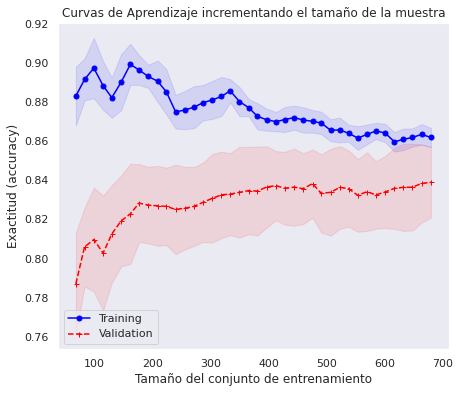

In [ ]:
# Obtenemos el gráfico con las curvas de aprendizaje: mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)
#PAra esta parte recordemos importar la libreria import matplotlib.pyplot as plt    y tambien la libreria    from sklearn.model_selection import learning_curve, validation_curve

print('Curvas de aprendizaje del modelo lineal:')
mi_ModeloYCurvas(X_train)

In [ ]:
#Ejercicio de curva de Validación

def create_validation_curve (x_val,y_val,param_name,cv_entrada,scoring):
  #Recordemos que esta variable modelo es local
  #Modelo contendra nuestro arbol de decision con los parametros por default de la funci[on DecisionTreeClassifier()
  modelo = DecisionTreeClassifier()
  pipe = Pipeline(steps=[("Preparainfo",Col_Trans),("model",modelo)])
  #Pipeline> Paso 1, prepara la informiacion, paso 2 prepara el modelo con el arbol de decisiones
  #Creamos el rango indicado Utilizar valores de máxima profundidad desde 1 hasta 20, avanzando del 1 al 30, 
  #Recorriendo solamente valores enteros, es decir no llevara decimas
  rango_param = np.linspace(1, 20, 20,dtype="int")
  #Creamos las variables t_scores, v_scores
  t_scores, v_scores = validation_curve(
      estimator=pipe,
      X=x_val, y=y_val, #Param_name contiene el parametro que se debe de aplicar en ese arbol pero lo personalizacmos
      param_name=f"model__{param_name}", #La variable va a buscar en el paso "model" de nuestro pipline el parametro que le indiquemos como argumento al inicio de la funcion
      param_range=rango_param, cv=cv_entrada,    # y define dicha variable 
      scoring=scoring,
  )

  return rango_param, t_scores, v_scores

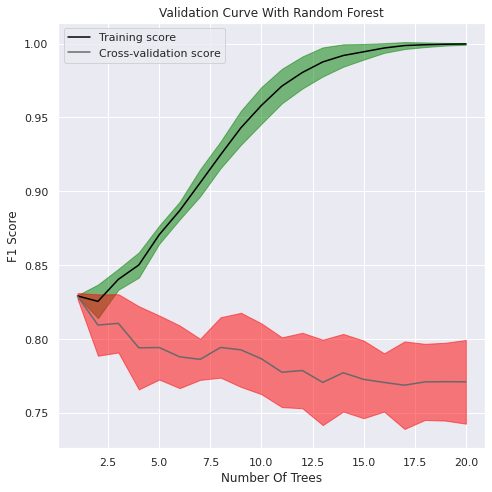

In [ ]:
from scipy.stats import alpha
param_range,train_score, validation_score = create_validation_curve(X_train,y_train,"max_depth",kfold,make_scorer(mi_f1score))
train_mean = np.mean(train_score, axis=1)
train_std = np.std(train_score, axis=1)
test_mean = np.mean(validation_score, axis=1)
test_std = np.std(validation_score, axis=1)

plt.subplots(1, figsize=(7,7))
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="green",alpha=0.5)
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red",alpha=0.5)
 
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("F1 Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()
#Con esto ploteamos el 4 e ii

In [ ]:
#Iniciamos el 4 e iii, Obtener las curvas de aprendizaje (learning_curve) en
'''Obtener las curvas de aprendizaje (learning_curve) en la cual se va incrementando
el tamaño de la muestra para el modelo de regresión bosque aleatorio (random forest) con su hiperparámetros predeterminados. Utilizar al menos 20 puntos en
la partición de los conjuntos de entrenamiento y la métrica “recall”, como evaluación del desempeño del modelo.'''

def mi_curvaRF(X_entrada): 
#Aqui usamos la funcion para el random forest
  modeloRF = RandomForestClassifier() 
  mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("ModeloUSadoRandomForest", modeloRF)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
  delta_train_sz = np.linspace(.1, 1, 20) #Aqui defininos 20 puntos enla partición, con 20 valores entre el .1 y el  1
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = X_entrada,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_recall)) #aqui reemplazamos el recall, con la funcion que tengamos de recall

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores) #llamamos la funcion de impresion de curvas con los parametros recien obtenidos

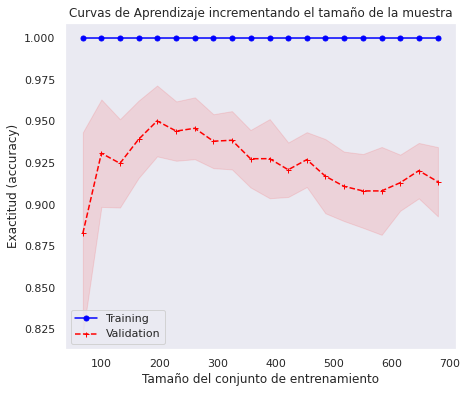

In [ ]:
mi_curvaRF(X_train)


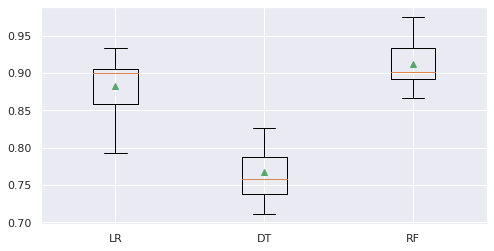

In [ ]:
sns.set(rc={'figure.figsize':(8,4)})

recall_list = list()

for i in range(len(resultados)):
  valor = resultados[i]['test_recall']
  recall_list.append(valor)

plt.boxplot(recall_list, labels=nombres, showmeans=True)

plt.show()

#**Ejercicio-5.**

In [ ]:
#Primero investigamos la forma de la funcion GridSearch
'''class sklearn.model_selection.GridSearchCV(estimator, param_grid, *,
                                           scoring=None, 
                                           n_jobs=None,
                                           refit=True,
                                           cv=None,
                                           verbose=0,
                                           pre_dispatch='2*n_jobs',
                                           error_score=nan,
                                           return_train_score=False)[source]'''

#Estos son los metodos compatibles
'''‘lbfgs’ - [‘l2’, ‘none’]
‘liblinear’ - [‘l1’, ‘l2’]
‘saga’ - [‘elasticnet’, ‘l1’, ‘l2’, ‘none’]

solver − str, {'newton-cg', 'lbfgs', 'liblinear', 'saag', 'saga'}, optional, default = 'liblinear'
Este parámetro representa qué algoritmo utilizar en el problema de optimización. A continuación se muestran las propiedades de las opciones bajo este parámetro:
liblinear - Es una buena opción para conjuntos de datos pequeños. También maneja la penalización L1. Para problemas multiclase, se limita a esquemas de uno contra resto.
newton-cg − Solo maneja la penalización L2.
lbfgs − Para problemas multiclase, maneja la pérdida multinomial. También maneja solo la penalización L2.
saga - Es una buena opción para grandes conjuntos de datos. Para problemas multiclase, también maneja la pérdida multinomial. Junto con la penalización L1, también admite la penalización 'elasticnet'.
sag - También se utiliza para grandes conjuntos de datos. Para problemas multiclase, también maneja la pérdida multinomial.'''

#Primero creamos o definimos la funcion a utilizar
#Antes era con funcion, pero ahora sera sin funcion, sera asi directo de un solo uso
#def mi_gridCV(X_train):

#Definimos los parametros que vamos a probar, elegimos del menu del restaurante MNA, revisar los metodos no compatibles con el Gridsearch
#Definimos una variable del inverso del alfa, que en este caso nos hace lo mismo del linspace en las funciones anteriores

modelo_CV = LogisticRegression(max_iter=9000, random_state=1) 
mi_pipeCV = Pipeline(steps=[("PreparaInfo", Col_Trans),("model", modelo_CV)]) #model es solo un tag
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

#Aqui probamos con los valores que se nos ocurran al momento

parametroC= [0.01, 0.1, 1, 10, 100, 1000]

#Primero generamos nuestra lista de parametros a utilizar con la funcion GridSearch
#A continuaci[on se observa 3 metrodos, que se leen, con este metodo, utilizame las sigueintes convinaciones, es una especie de creacion de un diccionario de

#Shift+ctrl+l, para seleccionar todo lo del mismo nombre
#REvisar que todo lo de abajo, tiene doble guion bajo
#El doble guion bajo

ParametrosGR = [{'model__penalty': ['l1'], 'model__solver': [ 'saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC},
                  {'model__penalty': ['l2'], 'model__solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC},
                  {'model__penalty': ['elasticnet'], 'model__solver': ['saga'], 'model__class_weight':['balanced', None], 'model__C': parametroC, 'model__l1_ratio': [0.5]},
                 ]
#Ahora definimos el modelo con el cual despues alimentaremos el pipeline par gridear
#Recordemos usar para este el modelo logi, que es el modelo predefinido para la regresion logistica
gridFinal=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParametrosGR,
                            scoring = 'f1', #Recordemos que aqui nos piden utilizar f1 score, por eso lo ponemos como scoring
                            cv = mi_kfoldCV)
  
#El fit es como feed, para alimentar con los datos de entrada y de salida
# recordar usar el np ravel con el y_train
gridFinal.fit(X_train, np.ravel(y_train))
#Tanto best score, como best params, son metodos especfificos predefinidos de las librerias
best_score = gridFinal.best_score_
best_param = gridFinal.best_params_
print("El mejor escor es:", best_score)
print("El mejor parametro es:", best_param)

#Recordemos que en la documentacion de las funciones, entontramos en la parte de ejemplos, la forma de importar las librerias

El mejor escor es: 0.8439021868634616
El mejor parametro es: {'model__C': 0.1, 'model__class_weight': None, 'model__penalty': 'l2', 'model__solver': 'saga'}


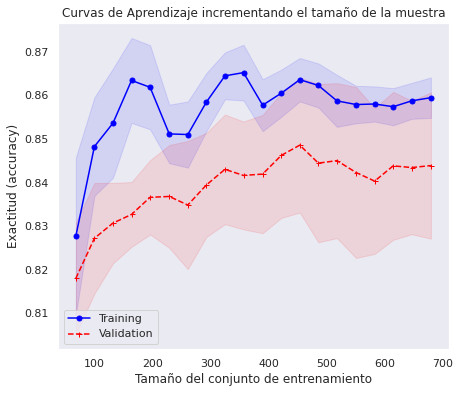

In [ ]:
#Ejercicio 5 b
'''Con los mejores valores de los hiperparámetros encontrados con la métrica “f1-score”
para el modelo de regresión logística, obtener las curvas de aprendizaje (learning curve),
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y
evitar el sobreentrenamiento o el subentrenamiento.'''

#Definimos la funcion para la grafica de la curva de aprendizaje

def graf_CV (X_entrada, parametro_C, penalizacion, resolutor):
  #Recordemos que las iteraciones aqui deben de ser altas arriba de las 8000
  modelo_CV = LogisticRegression(C=parametro_C, solver=resolutor, penalty=penalizacion, max_iter=8000, random_state=1)
  pipe_CV = Pipeline(steps=[("PreparaInfo", Col_Trans),("RegresionLogistica", modelo_CV)])
  kfold_CV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)
  train_size_CV = np.linspace(0.1, 1.0, 20) #incrementando el tamaño del conjunto de entrenamiento al menos 20 veces
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = pipe_CV ,    
                                                        X = X_entrada,
                                                        y = y_train,
                                                        cv = kfold_CV ,
                                                        train_sizes = train_size_CV ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_f1score))

  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores)

graf_CV(X_train, 0.1,'l2','saga')

In [ ]:
'''Hacemos el ejercicio 5 c
Para el modelo de árbol de decisión (decision tree) realizar el entrenamiento buscando sus mejores hiperparámetros con GridSearchCV(). 
Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. 
En este caso deberás usar la métrica (scoring) “precision”. 
Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “precision”. ¿Cuál es la utilidad de
la métrica “precision”? Incluye tus conclusiones.'''

#Copiamos casi todo lo del gridserachV, pero cambiamos parametros

modelo_CV = DecisionTreeClassifier() #Aqui es donde definimos que utilizaremos el decision tree
mi_pipeCV = Pipeline(steps=[("PreparaInfo", Col_Trans),("model", modelo_CV)]) #model es solo un tag
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  

ParametrosGR = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],  #Aqui tienen que ser chiquitos porque estan en el alfa, y en el otro en el c es el inverso del alfa
              'model__criterion': ['gini', 'entropy'], 
              'model__max_depth':[2, 4, 6, 8, 10, 12], 
              'model__min_samples_split':[2, 4, 6,8,10], #Aqui afecta algo que ahorita vamos a ver
              'model__class_weight': ['balanced', None]}

ArbolFinal=  GridSearchCV (estimator =  mi_pipeCV, 
                            param_grid = ParametrosGR,
                            scoring = make_scorer(mi_precision), #Para este ejericio utilizaremos la metrica precision, en vez del f1 usado en el anterior ejercicio
                            #scoring = ('precision'), Nunca pongan esto porfa
                            cv = mi_kfoldCV)
ArbolFinal.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('PreparaInfo',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numericas',
                                                                         Pipeline(steps=[('impMean',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2)))]),
                                                                         ['duration',
                                   

In [ ]:
#Ahora impirmimos los mejores
best_score = ArbolFinal.best_score_
best_param = ArbolFinal.best_params_
print("El mejor escor es:", best_score)
print("El mejor parametro es:", best_param)

El mejor escor es: 0.882290432268785
El mejor parametro es: {'model__ccp_alpha': 0.01, 'model__class_weight': 'balanced', 'model__criterion': 'entropy', 'model__max_depth': 2, 'model__min_samples_split': 2}


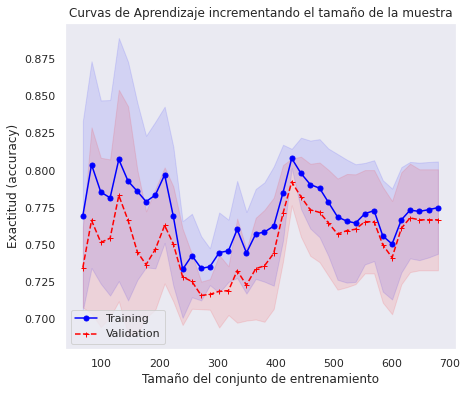

In [ ]:
#Este es el ejercicio 5 d
'''Con los mejores valores de los hiperparámetros encontrados con la métrica “precision”
para el modelo de árbol de decisión, obtener las curvas de aprendizaje (learning curve),
incrementando el tamaño del conjunto de entrenamiento al menos 20 veces. Si lo crees
adecuado, puedes hacer los ajustes que consideres adecuados para mejorar el resultado y
evitar el sobreentrenamiento o el subentrenamiento.'''

#PAra esta copiamos toda la funcion del arbol de arriba y la ajustamos a lo solicitado
def mi_curvaRF(X_entrada2): 
#Aqui usamos la funcion para el random forest
#Este renglon lo hecho puesto a la antiguita, ya tenemos un nuevo metodo mas aca.
  #modeloDT2 = DecisionTreeClassifier(ccp_alpha=0.01,criterion="entropy",max_depth=2,min_samples_split=2) #Aqui los parametros metemos lo que nos salio en la linea atenrio
  #usando el  # max_depth=gridDT.best_params_.get('max_depth')  # jalamos lo que queremos de nuestro arreglo best_params
  modeloDT2 = DecisionTreeClassifier(ccp_alpha=ArbolFinal.best_params_.get('model__ccp_alpha'),
                                     criterion=ArbolFinal.best_params_.get('model__criterion'),
                                     max_depth=ArbolFinal.best_params_.get('model__max_depth'),#aqui es como le pusimos a nuestros models en el renglon anterior
                                     min_samples_split=ArbolFinal.best_params_.get('model__min_samples_split')) #Aqui los parametros metemos lo que nos salio en la linea atenrio
 
  mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("ModeloDecisionTree", modeloDT2)])
  mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)  
  delta_train_sz = np.linspace(.1, 1, 40) #Aqui defininos 20 puntos enla partición, con 20 valores entre el .1 y el  1
  tr_sizes, tr_scores, val_scores = learning_curve(estimator = mi_pipe ,    
                                                        X = X_entrada2,
                                                        y = y_train,
                                                        cv = mi_kfold ,
                                                        train_sizes = delta_train_sz ,
                                                        random_state=10,
                                                        scoring=make_scorer(mi_precision)) #aqui reemplazamos la metrica por la precision
  mi_LearningCurvePlot(tr_sizes, tr_scores, val_scores) #Aqui imprimimos el learning curve que nos pide
mi_curvaRF(X_train)
#Notese que aqui la curva nos va a salir bien crica, pero es porque al parecer asi es, a los que le hicieron tratamiento y balanceo
#Les sale chida, a nosotros al parecer no
#Tal vez la preciosion este dando rara porque no estan balanceados los datos, habira de investigar como hacer un balanceo para hacer pruebas manana
#

In [ ]:
#Vamos con el ejercicio 5 e
'''Para el modelo de bosque aleatorio (random forest) realizar el entrenamiento buscando
sus mejores hiperparámetros con GridSearchCV(). Los hiperparámetros que debes incluir en su búsqueda deben ser al menos los siguientes: ccp_alpha, criterion, max_depth, min_samples_split y class_weight. En este caso deberás usar la métrica (scoring) “recall”.
Imprime la mejor combinación de parámetros obtenidos, así como el valor del mejor desempeño (score) obtenido con la métrica “recall”. ¿Cuál es la utilidad de la métrica
“recall”? Incluye tus conclusiones. NOTA: Toma en cuenta que el método de random forest pude tardar varios minutos en llevar a cabo'''

#Vamos a utilizar lo mismo que en el GridCV

modelo_CV = RandomForestClassifier() #Aqui es donde ponemos el bosque aleatorio
mi_pipeCV = Pipeline(steps=[("PreparaInfo", Col_Trans),("model", modelo_CV)])
mi_kfoldCV = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7)

ParametrosGRRF = {'model__ccp_alpha':[0.01, 0.001, .0001, .00001],
              'model__criterion': ['gini', 'entropy'],
              'model__max_depth':[2, 4, 6, 8, 10, 12],
              'model__min_samples_split':[2, 4, 6,8,10],
              'model__class_weight': ['balanced', None]}

BosqueFinal=  GridSearchCV (estimator =  mi_pipeCV, #Aqui es donde usamos la funci[on grid que nos piden]
                            param_grid = ParametrosGRRF,
                            scoring = make_scorer(mi_recall),#Aqui es donde usamos el recall que nos piden
                            cv = mi_kfoldCV)

BosqueFinal.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=7),
             estimator=Pipeline(steps=[('PreparaInfo',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('numericas',
                                                                         Pipeline(steps=[('impMean',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scalar',
                                                                                          MinMaxScaler(feature_range=(1,
                                                                                                                      2)))]),
                                                                         ['duration',
                                   

In [ ]:
#Imprimimos los mejores valores
print("best_score:", BosqueFinal.best_score_)
print("best_param:", BosqueFinal.best_params_)

best_score: 1.0
best_param: {'model__ccp_alpha': 0.01, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 2, 'model__min_samples_split': 2}


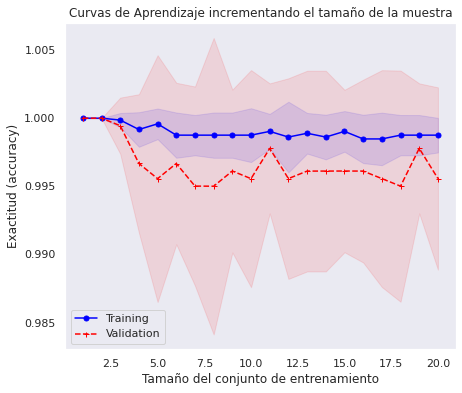

In [ ]:
#Ejercicio 5 f
'''Con los mejores valores de los hiperparámetros encontrados con la métrica “recall” para el modelo de bosque aleatorio, obtener las curvas de validación (validation curve),
incrementando la complejidad del modelo a través del hiperparámetro “max_depth” con al menos 10 valores. Si lo crees adecuado, puedes hacer los ajustes que consideres
adecuados para mejorar el resultado y evitar el sobreentrenamiento o el subentrenamiento.'''

modeloRF = RandomForestClassifier(ccp_alpha=BosqueFinal.best_params_.get('model__ccp_alpha'),
                                 criterion=BosqueFinal.best_params_.get('model__criterion'),
                                 max_depth=10, ##Pide al menos 10 BosqueFinal.best_params_.get('model__max_depth'),
                                 min_samples_split=BosqueFinal.best_params_.get('model__min_samples_split')) #Aqui los parametros metemos lo que nos salio en la linea atenrio
#modeloRF = RandomForestClassifier()
#Los valores que hacen que la grafica tenga lineas paralelas son> 'model__ccp_alpha': 1, 'model__class_weight': None, 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_split': 2

mi_pipe = Pipeline(steps=[("PreparaInfo", Col_Trans),("ModeloRandomForest", modeloRF)])
#mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=7) #con randmo state
mi_kfold = RepeatedStratifiedKFold(n_splits=5, n_repeats=3) #Por si quieren sin random state, tambien hay par todos
delta_train_sz = np.linspace(1,20,20, dtype=int) #Aqui defininos 10 puntos enla partición, con 20 valores entre el .1 y el  1

#Ojo aqui teniamos learning curve y es validation curve lo que esta bien

tr_scores, val_scores = validation_curve(n_jobs = 2, #Este parametro es para usar dos procesadores al mismo tiempo, para que sea mas rapido, varios estimadores lo tienene
                                  estimator = mi_pipe, #Si en n jobs le ponen -1 te agarra todos los procesadores que tengas
                                  X = X_train,
                                  y = np.ravel(y_train),
                                  param_name = f"ModeloRandomForest__max_depth", #Aqui va la etiqueta que tenemos en nuestro pipe
                                  param_range = delta_train_sz,
                                  cv = mi_kfold, 
                                  scoring = 'recall',
                                # scoring = make_scorer(mi_recall)
                                  )
#mi_Ploteador(delta_train_sz, tr_scores, val_scores, "curva de validacion")
mi_LearningCurvePlot(delta_train_sz, tr_scores, val_scores)

#**Ejercicio-6.**

In [ ]:
#Hacemos el 6a
'''Para cada uno de estos tres modelos, con las métricas que se consideraron en cada caso y usando el conjunto de Prueba que no has utilizado hasta ahora, obtener los modelos finales como se te
indica a continuación. Deberás usar además como conjunto de entrenamiento el llamado modelo de entrenamiento “aumentado” que consiste en las datos que estuviste utilizando para
entrenamiento y validación:
Obtener el modelo de regresión logística con los mejores parámetros que hayas encontrado con la métrica f1-score utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso. Incluir un gráfico del árbol de decisión final obtenido.'''

#Aqui vamos a copiar lo mismo que en el ejericio
#definimos unestiamdor que viene de nuestro modelo del ejercicio 5
estimador_optimo = gridFinal.best_estimator_
predicciones = estimador_optimo.predict(X_val)
print("Métrica f1-score: %.3f \n" %(mi_f1score(y_val, predicciones)))



Métrica f1-score: 0.819 



Métrica f1-score: 0.632 



[Text(0.5, 0.8333333333333334, 'X[6] <= 0.5\nentropy = 1.0\nsamples = 850\nvalue = [425.0, 425.0]'),
 Text(0.25, 0.5, 'X[0] <= 1.272\nentropy = 0.954\nsamples = 510\nvalue = [356.452, 213.206]'),
 Text(0.125, 0.16666666666666666, 'entropy = 0.998\nsamples = 299\nvalue = [159.375, 145.432]'),
 Text(0.375, 0.16666666666666666, 'entropy = 0.82\nsamples = 211\nvalue = [197.077, 67.774]'),
 Text(0.75, 0.5, 'X[36] <= 0.5\nentropy = 0.802\nsamples = 340\nvalue = [68.548, 211.794]'),
 Text(0.625, 0.16666666666666666, 'entropy = 1.0\nsamples = 52\nvalue = [25.706, 26.121]'),
 Text(0.875, 0.16666666666666666, 'entropy = 0.696\nsamples = 288\nvalue = [42.843, 185.673]')]

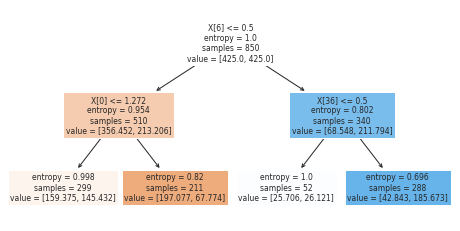

In [ ]:
#HAcemos el 6b
'''b. Obtener el modelo de árbol de decisiones con los mejores parámetros que hayas encontrado con la métrica “precision” utilizada. Imprimir el valor de dicha métrica e
incluye tus conclusiones finales para este caso.'''
#estimador_manual = ('model__ccp_alpha': 0.01, 'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_split': 0.1)
#estimador_optimo = DecisionTreeClassifier('model__ccp_alpha': 0.01, 'model__class_weight': 'balanced', 'model__criterion': 'gini', 'model__max_depth': 1, 'model__min_samples_split': 0.1)

#aqui es sin estimadadro manual ,donde lo jala automatico 
estimador_optimo = ArbolFinal.best_estimator_

predicciones = estimador_optimo.predict(X_val)
print("Métrica f1-score: %.3f \n" %(mi_f1score(y_val, predicciones)))

tree.plot_tree(estimador_optimo.named_steps["model"], filled = True)


In [ ]:
#HAcemos el 6c
'''c. Obtener el modelo de bosque aleatorio con los mejores parámetros que hayas encontrado con la métrica “recall” utilizada. Imprimir el valor de dicha métrica e incluye
tus conclusiones finales para este caso.'''

Mejor_bosque = BosqueFinal.best_estimator_
Bosque_predecido = Mejor_bosque.predict(X_val)

print("Métrica recall: %.3f \n" %(mi_recall(y_val, Bosque_predecido))) #Aqui pnemos la metrica recall, que es la solicitada


Métrica recall: 1.000 



###**Fin de la Actividad de la semana 6.**